In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as sp
from sklearn.metrics import mutual_info_score

df = pd.read_csv(r"C:\Julian\Proyectos\New York City Airbnb Open Data\AB_NYC_2019.csv")

print(df.head(n=5))

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [7]:
nEntries = df.shape[0]
nColumns = df.shape[1]
print('This table contains ' + str(nEntries) + ' entries and ' + str(nColumns) + ' columns')

This table contains 48895 entries and 16 columns


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [18]:
# Fill empy values in columns with object data type with NaN and numerical empty values with 0

df[['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']] = df[['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']].fillna('NaN')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = df['last_review'].fillna('NaN')

Fill empy values in columns with object data type with NaN
Fill numerical empy values with 0


In [19]:
# Check data has been correctly cleaned

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

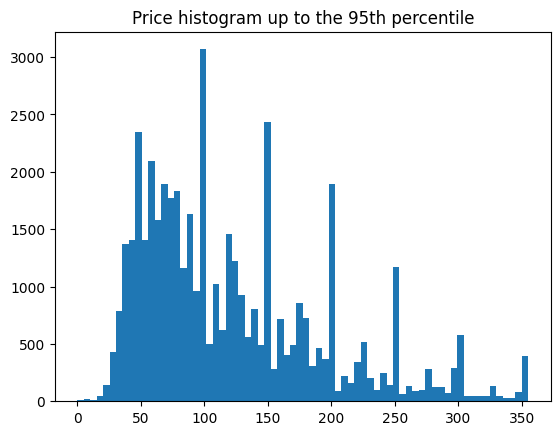

In [104]:
# limit = np.percentile(df['price'], 95)

plt.hist(df['price'], bins=70, range=(0, limit))
plt.title(label='Price histogram up to the 95th percentile')
plt.show()

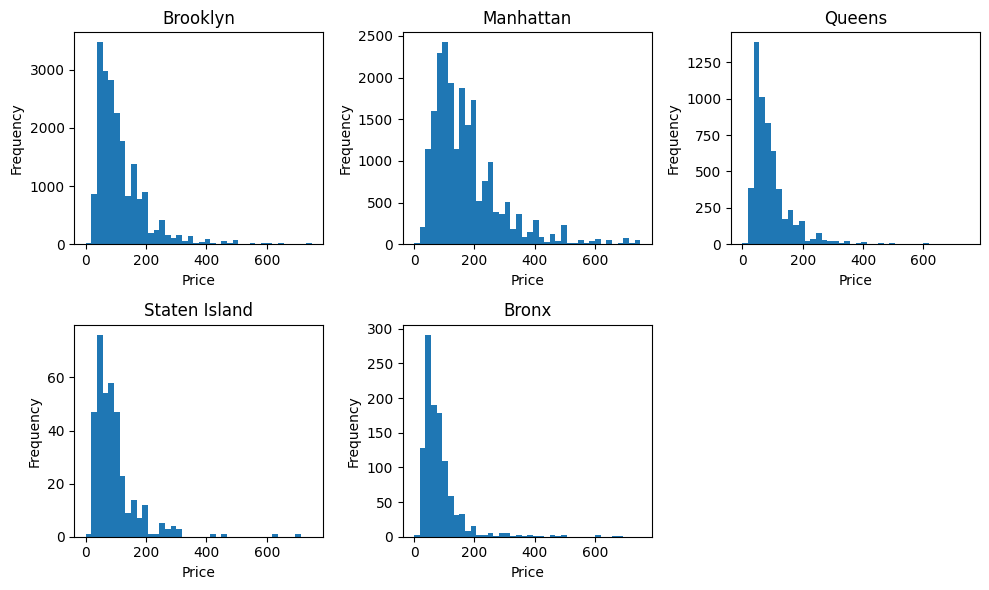

In [64]:
brooklynprices = df.loc[df['neighbourhood_group'] == 'Brooklyn', ['price']]
manhattanprices = df.loc[df['neighbourhood_group'] == 'Manhattan', ['price']]
queensprices = df.loc[df['neighbourhood_group'] == 'Queens', ['price']]
statenislandprices = df.loc[df['neighbourhood_group'] == 'Staten Island', ['price']]
bronxprices = df.loc[df['neighbourhood_group'] == 'Bronx', ['price']]

fig, axs = plt.subplots(2, 3, figsize=(10, 6))

axs = axs.flatten()

for i, (neighborhood, prices) in enumerate([('Brooklyn', brooklynprices), 
                                            ('Manhattan', manhattanprices), 
                                            ('Queens', queensprices),
                                            ('Staten Island', statenislandprices),
                                            ('Bronx', bronxprices)]):
    axs[i].hist(prices, bins=40, range=(0, 750))
    axs[i].set_title(neighborhood)
    axs[i].set_xlabel('Price')
    axs[i].set_ylabel('Frequency')

for i in range(len(axs)):
    if i >= len([('Brooklyn', brooklynprices), 
                ('Manhattan', manhattanprices), 
                ('Queens', queensprices),
                ('Staten Island', statenislandprices),
                ('Bronx', bronxprices)]):
        axs[i].axis('off')

plt.tight_layout()
plt.show()

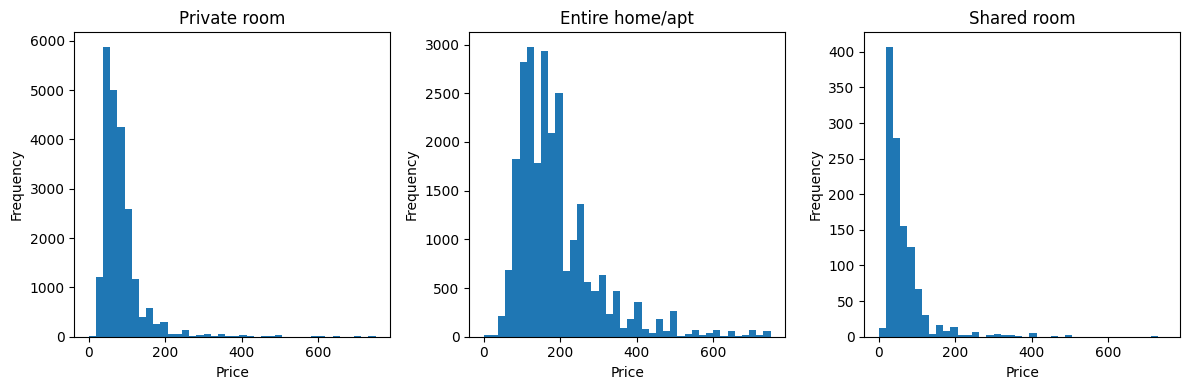

In [82]:
privateRoomPrices = df.loc[df['room_type'] == 'Private room', ['price']]
homeaptPrices = df.loc[df['room_type'] == 'Entire home/apt', ['price']]
sharedRoomPrices = df.loc[df['room_type'] == 'Shared room', ['price']]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs = axs.flatten()

for i, (neighborhood, prices) in enumerate([('Private room', privateRoomPrices), 
                                            ('Entire home/apt', homeaptPrices), 
                                            ('Shared room', sharedRoomPrices)]):
    axs[i].hist(prices, bins=40, range=(0, 750))
    axs[i].set_title(neighborhood)
    axs[i].set_xlabel('Price')
    axs[i].set_ylabel('Frequency')

for i in range(len(axs)):
    if i >= len([('Private room', privateRoomPrices), 
                ('Entire home/apt', homeaptPrices), 
                ('Shared room', sharedRoomPrices)]):
        axs[i].axis('off')

plt.tight_layout()
plt.show()

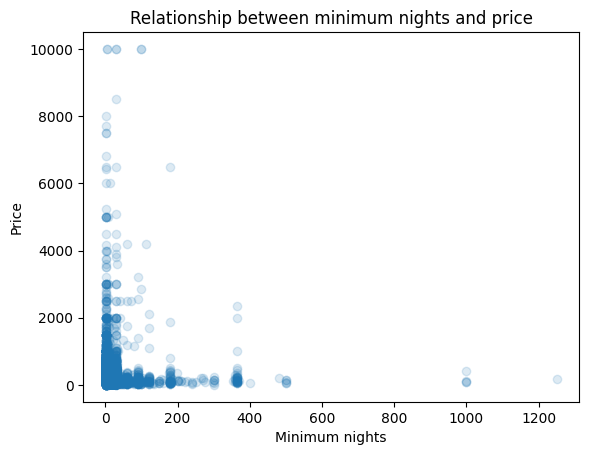

In [95]:
plt.scatter(x=df['minimum_nights'], y=df['price'], alpha=0.15)
plt.title('Relationship between minimum nights and price')
plt.xlabel("Minimum nights")
plt.ylabel("Price")
plt.show()

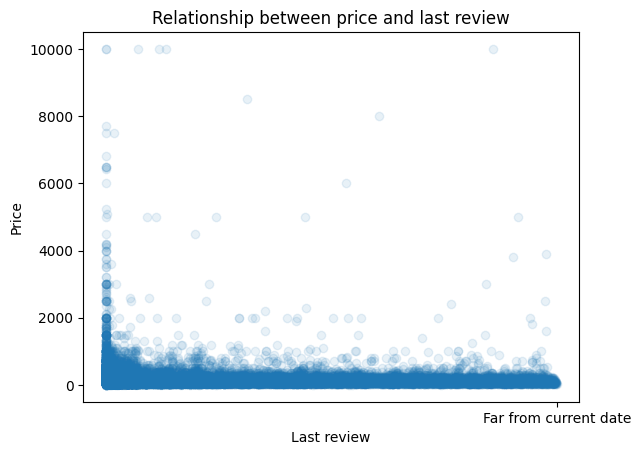

In [103]:
plt.scatter(x=df['last_review'], y=df['price'], alpha=0.1).axes.get_xaxis().set_ticks(['Far from current date'])
plt.title('Relationship between price and last review')
plt.xlabel("Last review")
plt.ylabel("Price")
plt.show()

In [137]:
df.corr(method='spearman')

C:\Users\Julian\AppData\Local\Temp\ipykernel_14280\1222267885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.558918,0.004996,0.070697,-0.020739,-0.057798,-0.307933,0.360443,0.135250,0.165714
host_id,0.558918,1.000000,0.049621,0.108965,-0.071772,-0.130251,-0.128008,0.267899,0.147273,0.173292
latitude,0.004996,0.049621,1.000000,0.035107,0.136172,0.022289,-0.044354,-0.023149,0.003526,-0.006962
longitude,0.070697,0.108965,0.035107,1.000000,-0.438035,-0.118921,0.079847,0.119089,0.063523,0.068899
price,-0.020739,-0.071772,0.136172,-0.438035,1.000000,0.101289,-0.055009,-0.018527,-0.106083,0.086088
minimum_nights,-0.057798,-0.130251,0.022289,-0.118921,0.101289,1.000000,-0.174905,-0.288797,0.064117,0.075981
number_of_reviews,-0.307933,-0.128008,-0.044354,0.079847,-0.055009,-0.174905,1.000000,0.706208,0.056054,0.236664
reviews_per_month,0.360443,0.267899,-0.023149,0.119089,-0.018527,-0.288797,0.706208,1.000000,0.146484,0.392126
calculated_host_listings_count,0.135250,0.147273,0.003526,0.063523,-0.106083,0.064117,0.056054,0.146484,1.000000,0.406606
availability_365,0.165714,0.173292,-0.006962,0.068899,0.086088,0.075981,0.236664,0.392126,0.406606,1.000000


In [146]:
mi_neigh_group = mutual_info_score(df['neighbourhood_group'], df['price'])
mi_neigh = mutual_info_score(df['neighbourhood'], df['price'])
mi_room = mutual_info_score(df['room_type'], df['price'])
print('The mutual information between price and neighbourhood group is ' + str(round(mi_neigh_group,3)))
print('The mutual information between price and neighbourhood is ' + str(round(mi_neigh,3)))
print('The mutual information between price and room type is ' + str(round(mi_room,3)))

The mutual information between price and neighbourhood group is 0.102
The mutual information between price and neighbourhood is 0.523
The mutual information between price and room type is 0.31


In [147]:
section = ['General', 'Queens', 'Brooklyn', 'Manhattan', 'Staten Island', 'Bronx', 'Private room', 'Entire home/apt', 'Shared room']
min = [np.min(df['price']), 
        np.min(df.loc[df['neighbourhood_group'] == 'Queens', 'price']),
        np.min(df.loc[df['neighbourhood_group'] == 'Brooklyn', 'price']),
        np.min(df.loc[df['neighbourhood_group'] == 'Manhattan', 'price']),
        np.min(df.loc[df['neighbourhood_group'] == 'Staten Island', 'price']),
        np.min(df.loc[df['neighbourhood_group'] == 'Bronx', 'price']),
        np.min(df.loc[df['room_type'] == 'Private room', 'price']),
        np.min(df.loc[df['room_type'] == 'Entire home/apt', 'price']),
        np.min(df.loc[df['room_type'] == 'Shared room', 'price'])]
               
fifth = [np.percentile(df['price'], 5),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Queens', 'price'], 5),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Brooklyn', 'price'], 5),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Manhattan', 'price'], 5),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Staten Island', 'price'], 5),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Bronx', 'price'], 5),
           np.percentile(df.loc[df['room_type'] == 'Private room', 'price'], 5),
           np.percentile(df.loc[df['room_type'] == 'Entire home/apt', 'price'], 5),
           np.percentile(df.loc[df['room_type'] == 'Shared room', 'price'], 5)]

twentyfifth = [np.percentile(df['price'], 25),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Queens', 'price'], 25),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Brooklyn', 'price'], 25),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Manhattan', 'price'], 25),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Staten Island', 'price'], 25),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Bronx', 'price'], 25),
           np.percentile(df.loc[df['room_type'] == 'Private room', 'price'], 25),
           np.percentile(df.loc[df['room_type'] == 'Entire home/apt', 'price'], 25),
           np.percentile(df.loc[df['room_type'] == 'Shared room', 'price'], 25)]
               
fiftieth = [np.percentile(df['price'], 50),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Queens', 'price'], 50),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Brooklyn', 'price'], 50),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Manhattan', 'price'], 50),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Staten Island', 'price'], 50),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Bronx', 'price'], 50),
           np.percentile(df.loc[df['room_type'] == 'Private room', 'price'], 50),
           np.percentile(df.loc[df['room_type'] == 'Entire home/apt', 'price'], 50),
           np.percentile(df.loc[df['room_type'] == 'Shared room', 'price'], 50)]
               
seventyfifth = [np.percentile(df['price'], 75),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Queens', 'price'], 75),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Brooklyn', 'price'], 75),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Manhattan', 'price'], 75),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Staten Island', 'price'], 75),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Bronx', 'price'], 75),
           np.percentile(df.loc[df['room_type'] == 'Private room', 'price'], 75),
           np.percentile(df.loc[df['room_type'] == 'Entire home/apt', 'price'], 75),
           np.percentile(df.loc[df['room_type'] == 'Shared room', 'price'], 75)]
               
ninetyfifth = [np.percentile(df['price'], 95),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Queens', 'price'], 95),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Brooklyn', 'price'], 95),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Manhattan', 'price'], 95),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Staten Island', 'price'], 95),
           np.percentile(df.loc[df['neighbourhood_group'] == 'Bronx', 'price'], 95),
           np.percentile(df.loc[df['room_type'] == 'Private room', 'price'], 95),
           np.percentile(df.loc[df['room_type'] == 'Entire home/apt', 'price'], 95),
           np.percentile(df.loc[df['room_type'] == 'Shared room', 'price'], 95)]

max = [np.max(df['price']), 
        np.max(df.loc[df['neighbourhood_group'] == 'Queens', 'price']),
        np.max(df.loc[df['neighbourhood_group'] == 'Brooklyn', 'price']),
        np.max(df.loc[df['neighbourhood_group'] == 'Manhattan', 'price']),
        np.max(df.loc[df['neighbourhood_group'] == 'Staten Island', 'price']),
        np.max(df.loc[df['neighbourhood_group'] == 'Bronx', 'price']),
        np.max(df.loc[df['room_type'] == 'Private room', 'price']),
        np.max(df.loc[df['room_type'] == 'Entire home/apt', 'price']),
        np.max(df.loc[df['room_type'] == 'Shared room', 'price'])]

results = pd.DataFrame()
results['Section'] = section
results['5th Percentile'] = fifth
results['25th Percentile'] = twentyfifth
results['50th Percentile'] = fiftieth
results['75th Percentile'] = seventyfifth
results['95th Percentile'] = ninetyfifth
results['Maximum'] = max
               
print('Summary statistics for the data presented')
print(results)
print('From this analysis we can infer that the variables that have the highest association with Airbnb prices in New York are:\n Neighbourhood, room type, neighbourhood group, minimum nights, calculated host listings and yearly availability')

Summary statistics for the data presented
           Section  5th Percentile  25th Percentile  50th Percentile  \
0          General           40.00             69.0            106.0   
1           Queens           35.00             50.0             75.0   
2         Brooklyn           39.00             60.0             90.0   
3        Manhattan           52.00             95.0            150.0   
4    Staten Island           32.00             50.0             75.0   
5            Bronx           29.00             45.0             65.0   
6     Private room           37.00             50.0             70.0   
7  Entire home/apt           78.00            120.0            160.0   
8      Shared room           24.95             33.0             45.0   

   75th Percentile  95th Percentile  Maximum  
0            175.0            355.0    10000  
1            110.0            225.0    10000  
2            150.0            285.0    10000  
3            220.0            450.0    10000  
4 